In [1]:
import numpy as np
from pylab import *
import os
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from hmf import MassFunction     # The main hmf class
from hmf import cosmo
from hmf import Transfer
%matplotlib inline

In [43]:
# !pip install hmf@git+git://github.com/steven-murray/hmf.git
# !pip install camb
# !pip install hmf
###### note: in order to add neutrino mass, need to change line 212 in hmf/density_field/transfer_models.py
# from:
## omch2=(self.cosmo.Om0 - self.cosmo.Ob0) * self.cosmo.h ** 2,
# to:
# omch2=(self.cosmo.Om0 - self.cosmo.Ob0) * self.cosmo.h ** 2 - sum(self.cosmo.m_nu.value)/93.14,

In [3]:
########## Quijote simulation parameter
om=0.3175
ob=0.049
h=0.6711
ns=0.9624
s8=0.834
mnu=0
mnu_ppp=0.4
w=-1

onu_ppp = mnu_ppp/93.14/h**2
onuh2_ppp = mnu_ppp/93.14
print (onu_ppp)

0.009535627558449613


In [44]:
MassFunction.get_all_parameter_defaults(recursive=False)
# MassFunction.parameter_info(["cosmo_model","sigma_8"])

{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {},
 'lnk_min': -18.420680743952367,
 'lnk_max': 9.903487552536127,
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10,
 'Mmax': 15,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

In [56]:
tr0 = Transfer(cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*ones(3)*(mnu/3)},
          sigma_8=s8,
          n=ns,)
trp = Transfer(cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*ones(3)*(mnu_ppp/3)},
          sigma_8=s8,
          n=ns,)

print (tr0.cosmo_params)
print (trp.cosmo_params)

#### test to make sure they're different (taking into account of neutrino mass effect)
# print (tr0.transfer_function - trp.transfer_function)

{'Om0': 0.3175, 'Ob0': 0.049, 'H0': 67.11, 'm_nu': <Quantity [0., 0., 0.] eV>}
{'Om0': 0.3175, 'Ob0': 0.049, 'H0': 67.11, 'm_nu': <Quantity [0.13333333, 0.13333333, 0.13333333] eV>}


In [53]:
############ test for various model

diff_arr = []
models = ['PS', 'ST', 'Tinker08']

for imodel in models:
    print (imodel)
    mf0 = MassFunction(z = 0, 
          cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*zeros(3)},
          hmf_model=imodel,
          sigma_8=s8, 
          Mmax=16,
          n=ns,
          takahashi=True)           
    mfp = MassFunction(z = 0,
          cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*ones(3)*(mnu_ppp/3)},
          hmf_model=imodel,
          Mmax=16,
          sigma_8=s8,
          n=ns,
          takahashi=True) 
    diff_arr.append([mf0.m, (mfp.dndlog10m-mf0.dndlog10m)/mnu_ppp])

PS
ST
Tinker08


In [55]:
print (mf0.cosmo_params)
print (mf0.sigma_8)

print (mfp.cosmo_params)
print (mfp.sigma_8)

{'Om0': 0.3175, 'Ob0': 0.049, 'H0': 67.11, 'm_nu': <Quantity [0., 0., 0.] eV>}
0.834
{'Om0': 0.3175, 'Ob0': 0.049, 'H0': 67.11, 'm_nu': <Quantity [0.13333333, 0.13333333, 0.13333333] eV>}
0.834


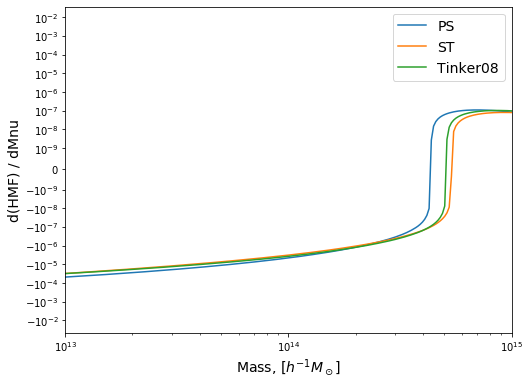

In [54]:
models = ['PS', 'ST', 'Tinker08']
figure(figsize=(8,6))
for i in range(len(models)):
    plot(diff_arr[i][0], diff_arr[i][1], label=models[i])
xlim(1e13, 1e15)
yscale('symlog', linthreshy=1e-9)
xscale('log')
xlabel(r"Mass, $[h^{-1}M_\odot]$",fontsize=14)
ylabel('d(HMF) / dMnu',fontsize=14)
legend(fontsize=14)
show()